In [2]:
# Install mglearn if not already installed
!pip install mglearn

#library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import mglearn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 20.7 MB/s eta 0:00:00


In [17]:
# 1. Load dataset
# Membaca file CSV yang berisi data
file_path = '/content/HeartDisease.csv'
data1 = pd.read_csv(file_path)

In [18]:
# 2. Melihat struktur data
# Menampilkan beberapa baris pertama dan informasi dasar tentang dataset
print(data1.head())
print(data1.info())
print(data1.columns)

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  num  
0  0.0   6.0    0  
1  3.0   3.0    2  
2  2.0   7.0    1  
3  0.0   3.0    0  
4  0.0   3.0    0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       

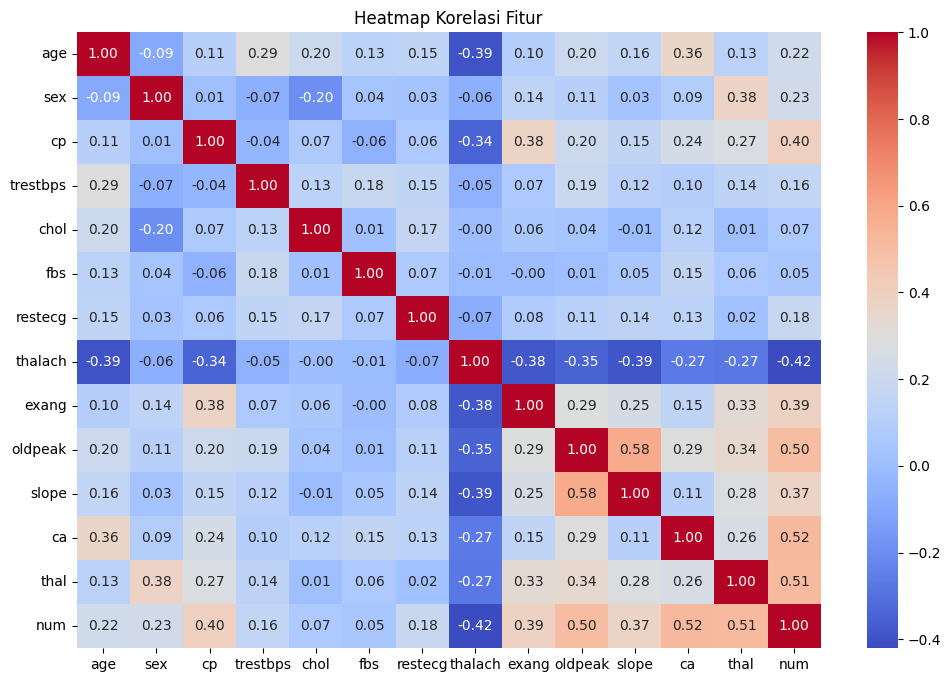

In [21]:
# 3. Data Cleaning
# Menghapus baris yang memiliki nilai kosong untuk memastikan data bersih
data1.dropna(inplace=True)

# Menampilkan heatmap korelasi untuk melihat hubungan antar fitur
plt.figure(figsize=(12, 8))
sns.heatmap(data1.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Heatmap Korelasi Fitur")
plt.show()

In [22]:
# 4. Memilih fitur dan target
# Target (variabel yang ingin diprediksi) adalah 'num'
# Fitur (variabel prediktor) adalah semua kolom kecuali 'num'
X = data1.drop(columns=['num'])  # Fitur
y = data1['num']  # Target

In [23]:
# 5. Mengubah variabel kategori menjadi numerik (jika ada)
# Menggunakan metode one-hot encoding untuk mengubah kolom kategori menjadi numerik
X = pd.get_dummies(X, drop_first=True)

In [32]:
# 6. Membagi data menjadi train dan test
# Data dibagi menjadi 80% training dan 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


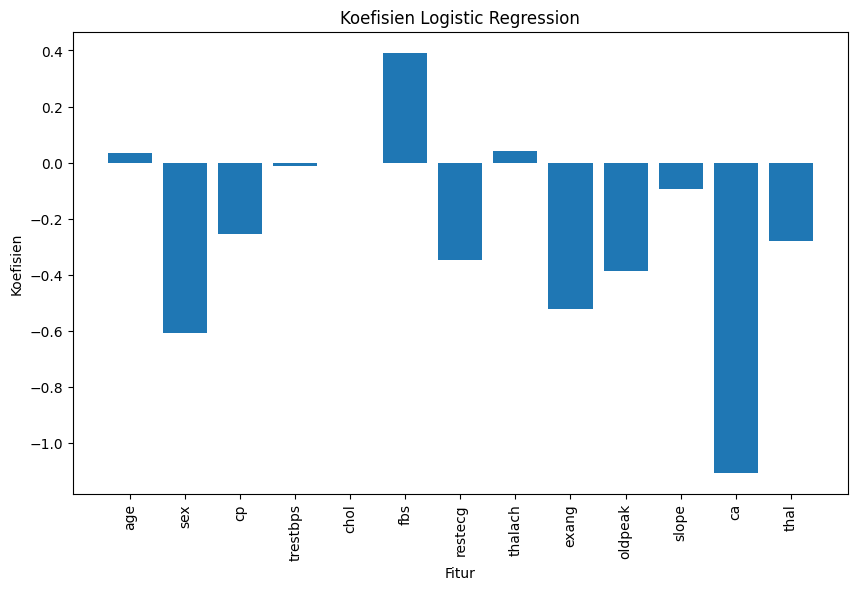

In [33]:
# 7. Inisialisasi dan latih model Logistic Regression
# Membuat model klasifikasi logistic regression dan melatihnya dengan data training
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Visualisasi Koefisien Model
plt.figure(figsize=(10, 6))
plt.bar(X.columns, model.coef_[0])
plt.xticks(rotation=90)
plt.xlabel("Fitur")
plt.ylabel("Koefisien")
plt.title("Koefisien Logistic Regression")
plt.show()

In [34]:
# 8. Prediksi pada test set
# Menggunakan model yang telah dilatih untuk memprediksi data uji
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilitas positif untuk AUC-ROC

In [36]:
# 9. Evaluasi Model
# Menghitung metrik evaluasi Accuracy, Precision, Recall, F1-Score, dan AUC-ROC
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
# Get probabilities for all classes
y_prob = model.predict_proba(X_test)
auc = roc_auc_score(y_test, y_prob, multi_class='ovr') # Calculate AUC using probabilities for all classes

In [37]:
# 10. Cetak hasil evaluasi
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("AUC-ROC:", auc)

Accuracy: 0.6
Precision: 0.2612121212121212
Recall: 0.2511111111111111
F1-Score: 0.24857142857142858
AUC-ROC: 0.7837059479183728


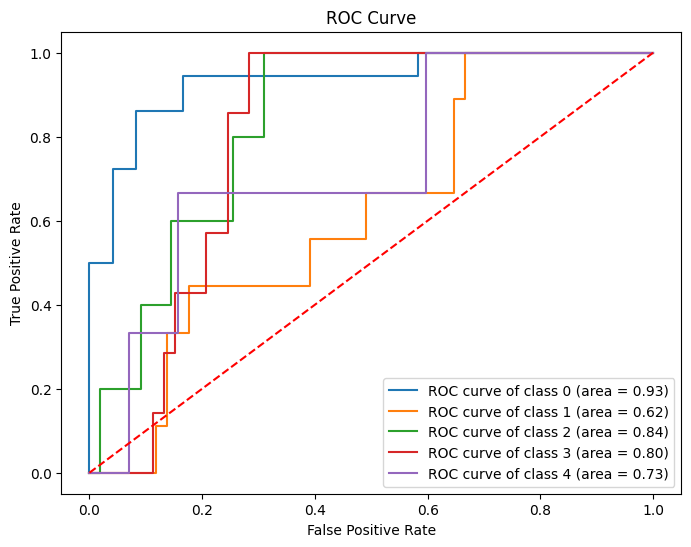

In [39]:
# 11. Visualisasi ROC Curve
# Assuming 'num' has values 0, 1, 2, 3, 4 (5 classes)
from sklearn.preprocessing import label_binarize

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4])
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_prob[:, i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

# **Persamaan Regresi Logistik:**
# Model regresi logistik memprediksi probabilitas kejadian dari suatu kelas.
# Bentuk umum dari persamaan regresi logistik adalah:

#     P(Y=1) = 1 / (1 + e^-(β0 + β1X1 + β2X2 + ... + βnXn))

# - β0 adalah intercept.
# - β1, β2, ..., βn adalah koefisien regresi.
# - e adalah basis logaritma natural (~2.718).

# **Akurasi:**
# Akurasi mengukur persentase prediksi yang benar dari total data.

#     Akurasi = (TP + TN) / (TP + TN + FP + FN)

# **Presisi:**
# Presisi mengukur seberapa banyak prediksi positif yang benar dibandingkan dengan semua prediksi positif.

#     Presisi = TP / (TP + FP)

# **Recall (Sensitivitas):**
# Recall mengukur seberapa banyak kasus positif yang benar-benar terdeteksi.

#     Recall = TP / (TP + FN)

# **F1-Score:**
# F1-Score adalah rata-rata harmonik antara presisi dan recall.

#     F1-Score = 2 * (Presisi * Recall) / (Presisi + Recall)

# **AUC (Area Under Curve):**
# AUC mengukur kemampuan model dalam membedakan antara kelas positif dan negatif.

# **ROC Curve:**
# ROC Curve menunjukkan hubungan antara True Positive Rate (Recall) dan False Positive Rate.
# Garis diagonal menunjukkan model acak, sementara kurva yang lebih ke atas menunjukkan model yang lebih baik.
